In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import wave
import matplotlib.pyplot as plt
import numpy as np
import random
import matplotlib.ticker as ticker
import math

### Фильтр

In [ ]:
from abc import ABC, abstractmethod
from typing import List
from scipy import signal

class Filtration(ABC):
    """
    Абстрактный класс для определения общего интерфейса классов фильтрации.
    """
    @abstractmethod
    def create_filter(self, freq_sample_rate: float,
                      frequency: List[float],
                      order: int) -> tuple:
        """
        Абстрактная функция для определения общего интерфейса функции фильтрации.

        Args:
            freq_sample_rate: Частота дискретизации сигнала.
            frequency: Список частот для фильтрации.
            order: Порядок фильтра.

        Returns:
            filter_parameters: Кортеж из двух массивов, представляющих коэффициенты фильтра.
        """
        pass

    def filter_data(self, trace: List[float],
                    freq_sample_rate: float,
                    frequency: List[float],
                    order: int) -> List[float]:
        """
        Функция для применения фильтра к данным.

        Args:
            trace: Список данных для фильтрации.
            freq_sample_rate: Частота дискретизации сигнала.
            frequency: Список частот для фильтрации.
            order: Порядок фильтра.

        Returns:
            filtered_trace: Список отфильтрованных данных.
        """
        b, a = self.create_filter(freq_sample_rate, frequency, order)
        return signal.filtfilt(b, a, trace)

class BandPassFiltration(Filtration):
    """
    Класс для полосовой фильтрации данных.
    """

    def create_filter(self, freq_sample_rate: float,
                      frequency: List[float],
                      order: int) -> tuple:
        """Создает параметры полосового фильтра.

        Args:
            freq_sample_rate: Частота дискретизации сигнала.
            frequency: Список частот для фильтрации (min_freq, max_freq).
            order: Порядок фильтра.

        Returns:
            filter_parameters: Кортеж из двух массивов, представляющих коэффициенты фильтра.
        """
        min_freq, max_freq = frequency
        filter_parameters = signal.butter(order, [min_freq, max_freq], fs=freq_sample_rate, btype='band')
        return filter_parameters

# Пример использования для фильтрации частот от 1500 Гц до 2500 Гц
sample_rate = 5000  # Пример частоты дискретизации, установите по вашему сигналу
frequency_range = [1500, 2500]  # Диапазон частот для фильтрации
order = 4  # Порядок фильтра

# Создание объекта фильтрации
bandpass_filter = BandPassFiltration()

# Пример данных, которые нужно отфильтровать
data_to_filter = [1.0, 2.0, 3.0, 2.0, 1.0, 0.0]  # Замените на реальные данные

# Применение фильтрации
filtered_data = bandpass_filter.filter_data(data_to_filter, sample_rate, frequency_range, order)

print(filtered_data)


### Продолжение

In [3]:
types = {
    1:  np.int8,
    2:  np.int16,
    4:  np.int32
}

In [6]:
def format_db(x, peak):
    """Преобразует амплитуду в децибелы."""
    return f"{20 * np.log10(abs(x) / peak):.1f} dB" if x != 0 else "-∞ dB"

In [29]:
def draw_random_file(folder_path):
    os.chdir(folder_path)
    filename = random.choice(os.listdir(folder_path))

    with wave.open(filename, 'rb') as wav:
        nchannels, sampwidth, framerate, nframes, comptype, compname = wav.getparams()

        data = wav.readframes(nframes)
        samples = np.frombuffer(data, dtype=np.int16)

        fig, axes = plt.subplots(nrows=nchannels, ncols=1, figsize=(20, 6 * nchannels), dpi=72)

        if nchannels == 1:
            axes = [axes]

        for n in range(nchannels):
            channel = samples[n::nchannels]

            # FFT
            fft_values = np.fft.rfft(channel)
            fft_magnitudes = np.abs(fft_values)
            frequencies = np.fft.rfftfreq(len(channel), d=1 / framerate)

            # Ограничение до 10 кГц
            max_freq = 10000
            mask = frequencies <= max_freq
            positive_freqs = frequencies[mask]
            positive_magnitudes = fft_magnitudes[mask]

            ax_fft = axes[n]
            ax_fft.plot(positive_freqs, positive_magnitudes, color="b")
            ax_fft.set_title(f"FFT - Канал {n + 1}", color="black", fontsize=10)
            ax_fft.set_xlabel("Частота (Гц)")
            ax_fft.set_ylabel("Амплитуда")

        plt.suptitle(f"FFT of {filename}", color="black", fontsize=14)

        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()

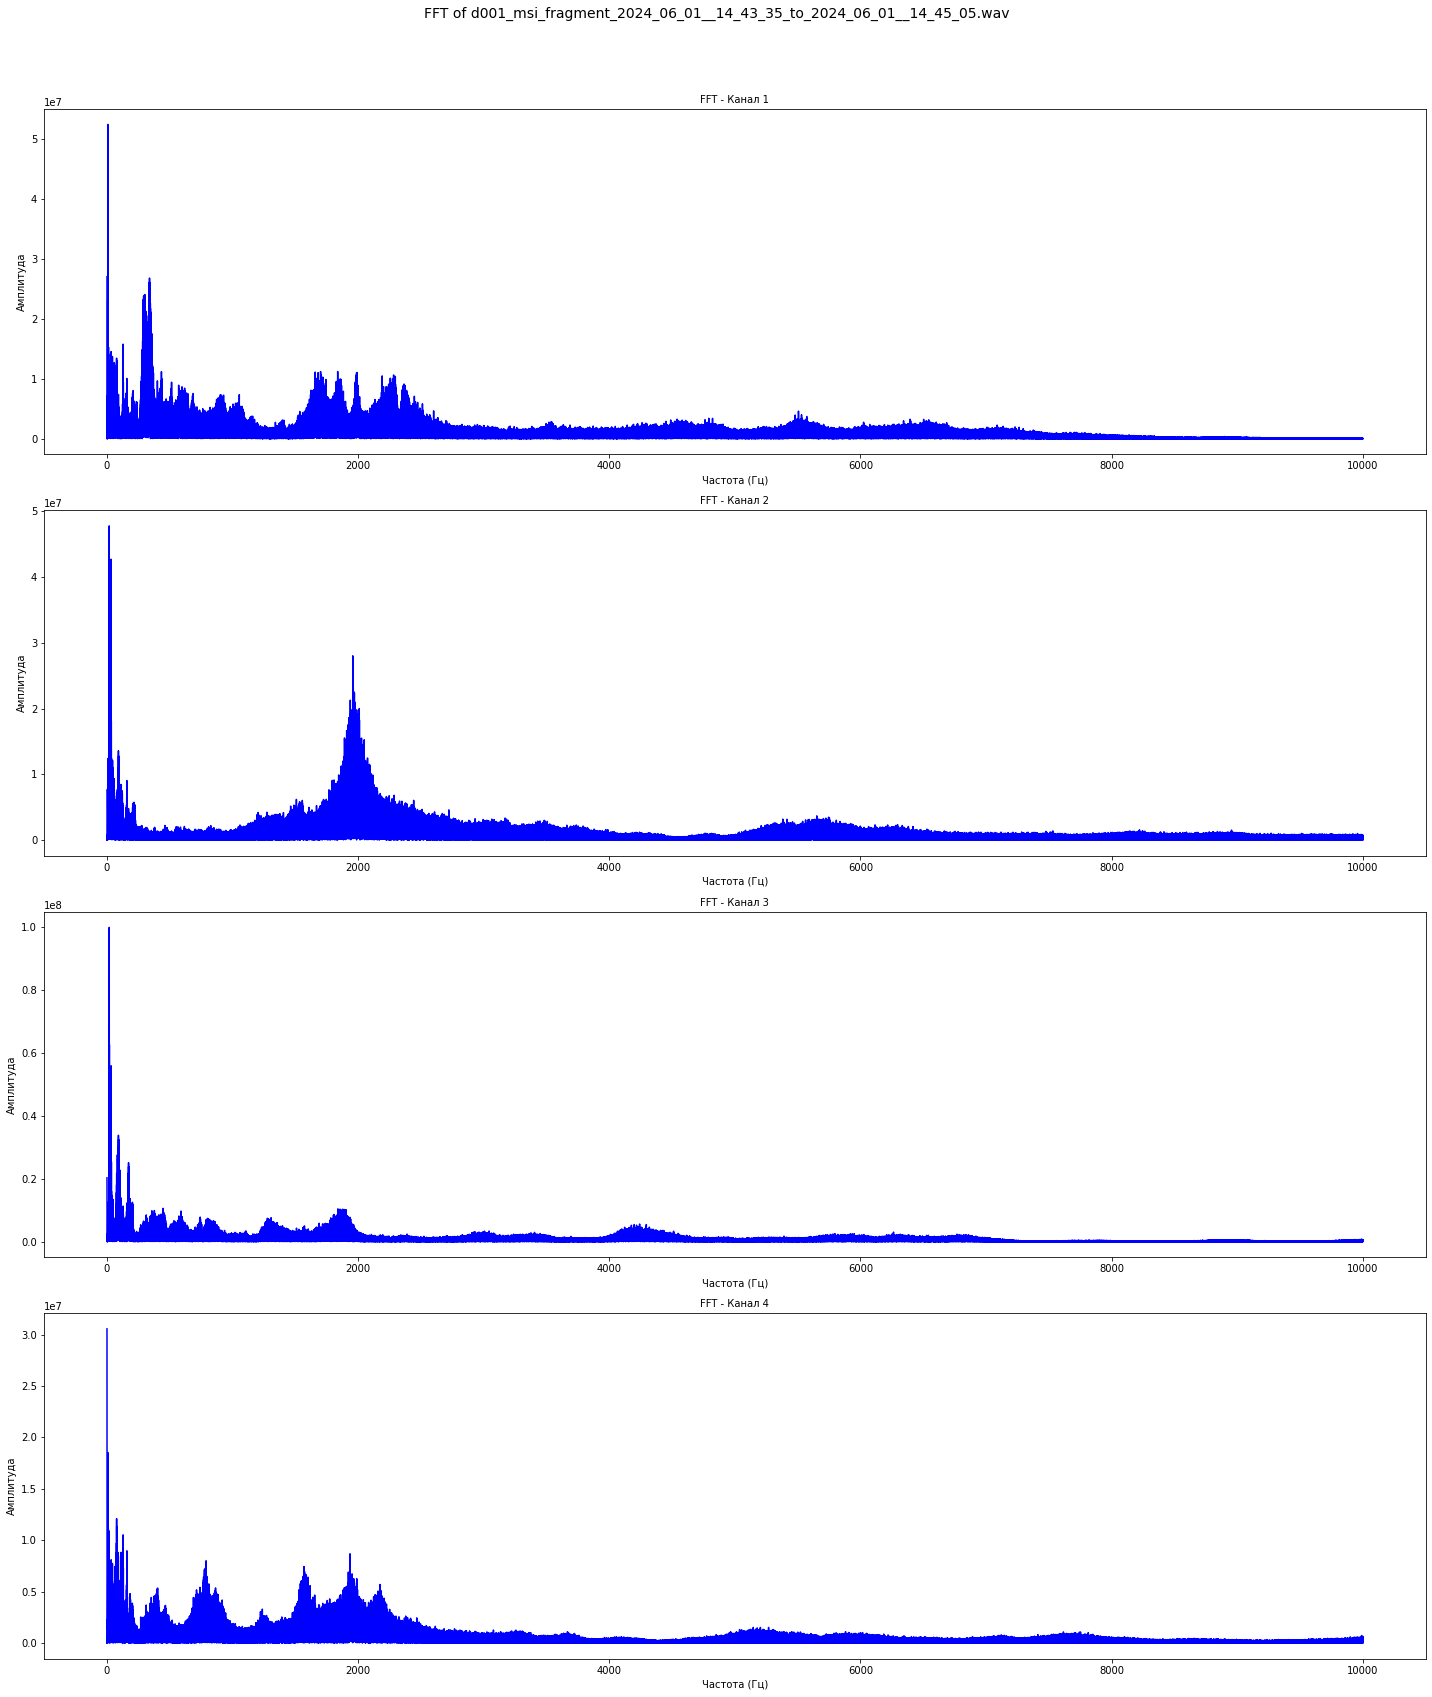

In [30]:
draw_random_file('/content/drive/MyDrive/cookie_fest/sound_data/2024_06_01')

In [ ]:
import pandas as pd

times = os.listdir()
result_time = []
for _, time in enumerate(times):
  start_time, end_time = time[18:-4].split('_to_')[0], time[18:-4].split('_to_')[1]
  start_time = start_time.replace('__', '_').split('_')
  end_time = end_time.replace('__', '_').split('_')

  start_time_str = ''
  end_time_str = ''

  for i in range(0, 3):
    start_time_str += str(start_time[i]) + '-'
    end_time_str += str(end_time[i]) + '-'

  start_time_str = start_time_str[:-1]
  end_time_str = end_time_str[:-1]

  start_time_str += ' '
  end_time_str += ' '
  for i in range(3, 6):
    start_time_str += str(start_time[i]) + ':'
    end_time_str += str(end_time[i]) + ':'

  start_time_str = start_time_str[:-1]
  end_time_str = end_time_str[:-1]

  start_time = pd.to_datetime(start_time_str, format="%Y-%m-%d %H:%M:%S")
  end_time = pd.to_datetime(end_time_str, format="%Y-%m-%d %H:%M:%S")

  result_time.append([start_time, end_time])

print(result_time)

In [ ]:
times_df = pd.DataFrame(result_time, columns=['start_time', 'end_time'])
times_df.to_csv('times.csv', index=False)

In [ ]:
def split_wav_file_by_channels(input_filename: str, output_folder: str, chunk_duration: int = 1):
    with wave.open(input_filename, 'rb') as input_wav:
        nchannels = input_wav.getnchannels()
        sampwidth = input_wav.getsampwidth()
        framerate = input_wav.getframerate()
        nframes = input_wav.getnframes()

        total_samples_per_second = framerate * nchannels

        print(f"Число сэмплов в 1 секунде для  каналов: {framerate}")
        frames_per_chunk = framerate * chunk_duration

        if not os.path.exists(output_folder):
            os.makedirs(output_folder)

        data = input_wav.readframes(nframes)

        start_time = extract_datetime_from_filename(input_filename)

        for second in range(0, nframes // frames_per_chunk):
            chunk_start = second * frames_per_chunk * sampwidth
            chunk_end = chunk_start + frames_per_chunk * sampwidth
            chunk_data = data[chunk_start:chunk_end]
            print(len(chunk_data))
            chunk_start_time = start_time + timedelta(seconds=second)
            chunk_end_time = chunk_start_time + timedelta(seconds=chunk_duration)

            output_filename = os.path.join(output_folder, f"{chunk_start_time.year}_{chunk_start_time.month}_{chunk_start_time.day} {chunk_start_time.hour}:{chunk_start_time.minute}:{chunk_start_time.second}.npy")

            chunk_samples = np.frombuffer(chunk_data, dtype=np.int16)

            with open(output_filename, 'wb') as output_file:
                for channel in range(nchannels):
                    channel_data = chunk_samples[channel::nchannels]
                    np.save(output_file, channel_data)

            print(f"Сохранен файл: {output_filename}")

input_folder = '/content/drive/MyDrive/Colab Notebooks/src'
output_folder = '/content/drive/MyDrive/Colab Notebooks/splitted'


for filename in os.listdir(input_folder):
    if filename.endswith('.wav'):
        input_filepath = os.path.join(input_folder, filename)
        split_wav_file_by_channels(input_filepath, output_folder)